# Standard Workflow

In [1]:
!pip install -q scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.3 MB/s eta 0:00:00


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, AdamW, Nadam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
from scikeras.wrappers import KerasClassifier
from scipy.stats import uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [3]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Print shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


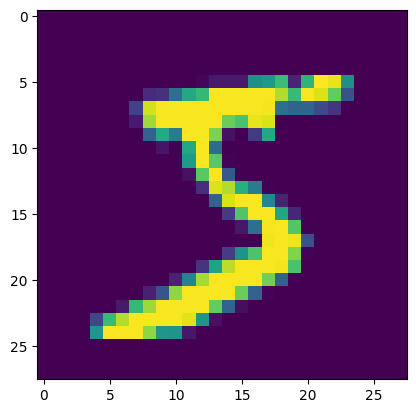

In [5]:
# Plot a data instance
plt.imshow(X_train[0])

In [6]:
# Normalize the data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [7]:
# Define the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=15
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8273 - loss: 0.6779
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9304 - loss: 0.2455
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1838
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9578 - loss: 0.1466
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9625 - loss: 0.1276
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9686 - loss: 0.1090
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9728 - loss: 0.0938
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9737 - loss: 0.0911
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9769 - loss: 0.0781
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9790 - loss: 0.0739
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9804 - loss: 0.0682
Epoch 12/15
1875/1875 ━━━━━━━━

In [9]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9568 - loss: 0.1428


[0.12811850011348724, 0.961899995803833]

# Hyperparameter Tuning

In [10]:
# Function to build the model
def build_model(
        n_hidden=1,
        n_neurons=32,
        learning_rate=0.001,
        optimizer=Adam,
        activation_function='relu',
        kernel_initializer='he_normal',
        add_dropout=False,
        dropout_rate=0.2,
        add_batch_normalization=False
    ):

    model=Sequential()
    model.add(Input(shape=(28, 28))),
    model.add(Flatten()),
    for layer in range(n_hidden):
        model.add(Dense(
            n_neurons,
            activation=activation_function,
            kernel_initializer=kernel_initializer
        ))
        if add_dropout:
            model.add(Dropout(dropout_rate))
        if add_batch_normalization:
            model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    # Instantiate the optimizer with the specified learning rate
    optimizer_instance=optimizer(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer_instance,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [11]:
# Build the model
model = build_model(
    n_hidden=3,
    n_neurons=64
)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define the Keras classifier
keras_clf = KerasClassifier(build_model)

In [13]:
# Test the model
keras_clf.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8185 - loss: 0.6974
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9302 - loss: 0.2440
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9452 - loss: 0.1880
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9543 - loss: 0.1547
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9620 - loss: 0.1287
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9660 - loss: 0.1142
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9698 - loss: 0.0992
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9728 - loss: 0.0894
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0795
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0739
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9788 - loss: 0.0709
Epoch 12/15
1875/1875 ━━━━━━━━

KerasClassifier(
	model=<function build_model at 0x7de953133910>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [14]:
# Evaluate the model
keras_clf.score(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9679

In [15]:
# Define the parameter distributions
param_distributions = {
    'model__n_hidden': [3, 4],
    'model__n_neurons': [128, 256],
    'model__learning_rate': loguniform(1e-4, 5e-3),
    'model__optimizer': [Adam, Nadam],
    'model__activation_function': ['relu', 'selu'],
    'model__kernel_initializer': ['he_normal', 'glorot_normal'],
    'model__add_dropout': [True, False],
    'model__dropout_rate': uniform(0.2, 0.1),
    'model__add_batch_normalization': [True, False]
}

In [16]:
# Define the model
keras_clf = KerasClassifier(
    build_model,
    verbose=0
)

# Define the randomized search
random_search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1
)

In [17]:
# Run the search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function build_model at 0x7de953133910>, verbose=0),
                   n_jobs=1,
                   param_distributions={'model__activation_function': ['relu',
                                                                       'selu'],
                                        'model__add_batch_normalization': [True,
                                                                           False],
                                        'model__add_dropout': [True, False],
                                        'model__dropout_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7de...38b50>,
                                        'model__kernel_initializer': ['he_normal',
                                                                      'glorot_normal'],
                                        'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7de952daa140>,
                                        'model__n_hidden': [3, 4],
                                        'model__n_neurons': [128, 256],
                                        'model__optimizer': [<class 'keras.src.optimizers.adam.Adam'>,
                                                             <class 'keras.src.optimizers.nadam.Nadam'>]},
                   random_state=42, verbose=1)

In [18]:
# Best estimator
print("Best Estimator:")
print(random_search.best_estimator_)
print("\n" + "="*50 + "\n")

# Best parameters
print("Best Parameters:")
pprint(random_search.best_params_)
print("\n" + "="*50 + "\n")

# Best score
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")
print("\n" + "="*50 + "\n")

# CV results
cv_results = pd.DataFrame(random_search.cv_results_)
print("All Cross-Validation Results:")
display(cv_results[['param_' + key for key in random_search.param_distributions.keys()] +
                ['mean_test_score', 'std_test_score', 'rank_test_score']])

print("\n" + "="*50 + "\n")

Best Estimator:
KerasClassifier(
	model=<function build_model at 0x7de953133910>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
	model__activation_function=relu
	model__add_batch_normalization=True
	model__add_dropout=False
	model__dropout_rate=0.2775132823361115
	model__kernel_initializer=glorot_normal
	model__learning_rate=0.0004691896228409861
	model__n_hidden=4
	model__n_neurons=256
	model__optimizer=<class 'keras.src.optimizers.adam.Adam'>
)


Best Parameters:
{'model__activation_function': 'relu',
 'model__add_batch_normalization': True,
 'model__add_dropout': False,
 'model__dropout_rate': 0.2775132823361115,
 'model__kernel_initializer': 'glorot_normal',
 'model__learning_rate': 0.0004691896228409861,
 'model__n_hidden': 4,
 'model__n_neurons': 256,
 'model__optimizer': <class

,param_model__n_hidden,param_model__n_neurons,param_model__learning_rate,param_model__optimizer,param_model__activation_function,param_model__kernel_initializer,param_model__add_dropout,param_model__dropout_rate,param_model__add_batch_normalization,mean_test_score,std_test_score,rank_test_score
0,3,256,0.001040,<class 'keras.src.optimizers.adam.Adam'>,relu,glorot_normal,True,0.218343,False,0.950817,0.001625,2
1,3,256,0.000175,<class 'keras.src.optimizers.adam.Adam'>,relu,glorot_normal,True,0.286618,True,0.921467,0.002637,8
2,3,128,0.000204,<class 'keras.src.optimizers.nadam.Nadam'>,selu,glorot_normal,False,0.293855,False,0.910600,0.001982,10
3,3,256,0.000779,<class 'keras.src.optimizers.nadam.Nadam'>,selu,he_normal,True,0.243195,False,0.923883,0.002123,6
4,3,256,0.002158,<class 'keras.src.optimizers.adam.Adam'>,selu,glorot_normal,False,0.223277,False,0.920767,0.006829,9
5,3,128,0.001432,<class 'keras.src.optimizers.nadam.Nadam'>,selu,he_normal,True,0.204645,False,0.927967,0.004166,5
6,3,256,0.000329,<class 'keras.src.optimizers.nadam.Nadam'>,selu,glorot_normal,False,0.256329,True,0.937500,0.002369,4
7,3,256,0.002604,<class 'keras.src.optimizers.adam.Adam'>,selu,he_normal,False,0.212204,True,0.945133,0.001329,3
8,4,256,0.000765,<class 'keras.src.optimizers.nadam.Nadam'>,selu,glorot_normal,False,0.275536,False,0.923383,0.006235,7
9,4,256,0.000469,<class 'keras.src.optimizers.adam.Adam'>,relu,glorot_normal,False,0.277513,True,0.952117,0.002893,1


# Tunable Callbacks

In [19]:
!pip install -q scikeras

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier
from scipy.stats import uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import datetime
import uuid
import gc
import os

In [21]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Select a subset of test data for visualization
visualization_X = X_test.copy()
visualization_y = y_test.copy()

In [22]:
class VisualizePredictionsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X, y, num_samples=5, save_plot=False):
        """
        Initializes the callback.

        Parameters:
        - X (numpy.ndarray): Images to visualize.
        - y (numpy.ndarray): True labels corresponding to X.
        - num_samples (int): Number of random samples to visualize.
        - save_plot (bool): Whether to save the plot as an image file.
        """
        super(VisualizePredictionsCallback, self).__init__()
        self.X = X
        self.y = y
        self.num_samples = num_samples
        self.save_plot = save_plot

    def on_epoch_end(self, epoch, logs=None):
        print(f"[Callback] VisualizePredictionsCallback: Epoch {epoch+1} ended.")
        # Select random samples
        indices = np.random.choice(len(self.X), self.num_samples, replace=False)
        sample_images = self.X[indices]
        sample_labels = self.y[indices]

        # Generate predictions
        predictions = self.model.predict(sample_images)
        predicted_labels = np.argmax(predictions, axis=1)

        # Plot the images with predictions
        plt.figure(figsize=(15, 5))
        plt.subplots_adjust(top=0.80)
        plt.suptitle(f"Epoch {epoch+1} Prediction Sample", fontsize=16, y=0.93)

        for i in range(self.num_samples):
            plt.subplot(1, self.num_samples, i+1)
            plt.imshow(sample_images[i], cmap='gray')
            plt.axis('off')
            title_color = 'green' if predicted_labels[i] == sample_labels[i] else 'red'
            plt.title(f"Pred: {predicted_labels[i]}\nTrue: {sample_labels[i]}", color=title_color, fontsize=10)

        if self.save_plot:
            timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            filename = f'epoch_{epoch+1}_predictions_{timestamp}.png'
            plt.savefig(filename)
            print(f"[Callback] Saved predictions plot for epoch {epoch+1} as {filename}")

        plt.tight_layout(rect=[0, 0.03, 1, 0.88])
        plt.show()

In [23]:
class PlotHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, save_plot=True):
        super(PlotHistoryCallback, self).__init__()
        self.save_plot = save_plot

    def on_train_begin(self, logs=None):
        print("[Callback] PlotHistoryCallback: Training started.")
        self.history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    def on_epoch_end(self, epoch, logs=None):
        # Append metrics for each epoch
        for key in logs:
            if key in self.history:
                self.history[key].append(logs[key])
        print(f"[Callback] PlotHistoryCallback: Epoch {epoch+1} ended. Logs: {logs}")

    def on_train_end(self, logs=None):
        print("[Callback] PlotHistoryCallback: Training ended. Plotting history.")
        epochs = range(1, len(self.history['loss']) + 1)

        plt.figure(figsize=(14, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history['loss'], 'b-', label='Training Loss')
        plt.plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history['accuracy'], 'b-', label='Training Accuracy')
        plt.plot(epochs, self.history['val_accuracy'], 'r-', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()

        if self.save_plot:
            timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            filename = f'training_history_{timestamp}.png'
            plt.savefig(filename)
            print(f"[Callback] Training history plot saved as {filename}")

        plt.show()

In [24]:
# Define the callback-building function
def build_callbacks(
    early_stopping_patience=5,
    reduce_lr_factor=0.2,
    reduce_lr_patience=3,
    reduce_lr_min_lr=1e-6,
    disable_model_checkpoint=False,
    visualize=True,
    visualize_num_samples=5,
    visualize_save_plot=False,
    plot_history=True,
    plot_history_save_plot=True
):
    """
    Builds a list of callbacks based on the provided hyperparameters.

    Parameters:
    - early_stopping_patience (int): Patience for EarlyStopping.
    - reduce_lr_factor (float): Factor for ReduceLROnPlateau.
    - reduce_lr_patience (int): Patience for ReduceLROnPlateau.
    - reduce_lr_min_lr (float): Minimum learning rate for ReduceLROnPlateau.
    - disable_model_checkpoint (bool): Whether to disable ModelCheckpoint.
    - visualize (bool): Whether to include the VisualizePredictionsCallback.
    - visualize_num_samples (int): Number of samples to visualize.
    - visualize_save_plot (bool): Whether to save the visualization plots.
    - plot_history (bool): Whether to include the PlotHistoryCallback.
    - plot_history_save_plot (bool): Whether to save the training history plot.

    Returns:
    - List of callback instances.
    """
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=early_stopping_patience,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=reduce_lr_factor,
            patience=reduce_lr_patience,
            min_lr=reduce_lr_min_lr,
            verbose=1
        )
    ]

    if not disable_model_checkpoint:
        callbacks.append(
            ModelCheckpoint(
                filepath=f'best_model_{uuid.uuid4().hex}.keras',
                monitor='val_loss',
                save_best_only=True,
                verbose=1
            )
        )

    if visualize:
        visualize_predictions = VisualizePredictionsCallback(
            X=visualization_X,
            y=visualization_y,
            num_samples=visualize_num_samples,
            save_plot=visualize_save_plot
        )
        callbacks.append(visualize_predictions)
    if plot_history:
        plot_history_callback = PlotHistoryCallback(save_plot=plot_history_save_plot)
        callbacks.append(plot_history_callback)

    print("[Function] build_callbacks: Callbacks have been built and added.")
    return callbacks

In [25]:
# Define the model-building function
def build_model(
        n_hidden=1,
        n_neurons=32,
        learning_rate=0.001,
        optimizer=Adam,
        activation_function='relu',
        kernel_initializer='he_normal',
        add_dropout=False,
        dropout_rate=0.2,
        add_batch_normalization=False
    ):
    """
    Builds and compiles the Keras model.

    Parameters:
    - n_hidden (int): Number of hidden Dense layers.
    - n_neurons (int): Number of neurons in each hidden Dense layer.
    - learning_rate (float): Learning rate for the optimizer.
    - optimizer (class): Optimizer class from Keras.optimizers.
    - activation_function (str): Activation function for Dense layers.
    - kernel_initializer (str): Kernel initializer for Dense layers.
    - add_dropout (bool): Whether to add Dropout layers.
    - dropout_rate (float): Dropout rate if Dropout layers are added.
    - add_batch_normalization (bool): Whether to add BatchNormalization layers.

    Returns:
    - Compiled Keras model.
    """
    # Build the model
    model = Sequential()
    model.add(Input(shape=(28, 28)))
    model.add(Flatten())

    for _ in range(n_hidden):
        model.add(Dense(
            n_neurons,
            activation=activation_function,
            kernel_initializer=kernel_initializer
        ))
        if add_dropout:
            model.add(Dropout(dropout_rate))
        if add_batch_normalization:
            model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    # Instantiate the optimizer with the specified learning rate
    optimizer_instance = optimizer(learning_rate=learning_rate)

    # Compile the model
    model.compile(
        optimizer=optimizer_instance,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("[Function] build_model: Model has been built and compiled.")
    return model

In [26]:
class KerasClassifierWithCallbacks(KerasClassifier):
    def __init__(
        self,
        model,
        fit__callbacks=None,
        # Model hyperparameters
        n_hidden=1,
        n_neurons=32,
        learning_rate=0.001,
        optimizer=Adam,
        activation_function='relu',
        kernel_initializer='he_normal',
        add_dropout=False,
        dropout_rate=0.2,
        add_batch_normalization=False,
        # Callback hyperparameters
        early_stopping_patience=5,
        reduce_lr_factor=0.2,
        reduce_lr_patience=3,
        reduce_lr_min_lr=1e-6,
        disable_model_checkpoint=False,
        visualize=True,
        visualize_num_samples=5,
        visualize_save_plot=False,
        plot_history=True,
        plot_history_save_plot=True,
        **kwargs
    ):
        """
        Initializes the custom KerasClassifier with callbacks.
        """
        # Store callback hyperparameters as attributes
        self.early_stopping_patience = early_stopping_patience
        self.reduce_lr_factor = reduce_lr_factor
        self.reduce_lr_patience = reduce_lr_patience
        self.reduce_lr_min_lr = reduce_lr_min_lr
        self.disable_model_checkpoint = disable_model_checkpoint
        self.visualize = visualize
        self.visualize_num_samples = visualize_num_samples
        self.visualize_save_plot = visualize_save_plot
        self.plot_history = plot_history
        self.plot_history_save_plot = plot_history_save_plot

        if fit__callbacks is None:
            # Build callbacks based on callback hyperparameters
            callbacks = build_callbacks(
                early_stopping_patience=self.early_stopping_patience,
                reduce_lr_factor=self.reduce_lr_factor,
                reduce_lr_patience=self.reduce_lr_patience,
                reduce_lr_min_lr=self.reduce_lr_min_lr,
                disable_model_checkpoint=self.disable_model_checkpoint,
                visualize=self.visualize,
                visualize_num_samples=self.visualize_num_samples,
                visualize_save_plot=self.visualize_save_plot,
                plot_history=self.plot_history,
                plot_history_save_plot=self.plot_history_save_plot
            )
        else:
            # Use the provided callbacks
            callbacks = fit__callbacks

        # Pass 'fit__callbacks' to the superclass
        kwargs['fit__callbacks'] = callbacks

        # Initialize superclass with all other parameters
        super().__init__(
            model=model,
            **kwargs
        )

        # Store model hyperparameters as attributes
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.activation_function = activation_function
        self.kernel_initializer = kernel_initializer
        self.add_dropout = add_dropout
        self.dropout_rate = dropout_rate
        self.add_batch_normalization = add_batch_normalization

        print("[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.")

    def get_params(self, deep=True):
        # Get the parameters from the superclass
        params = super().get_params(deep=deep)

        # Add the custom parameters
        params.update({
            'n_hidden': self.n_hidden,
            'n_neurons': self.n_neurons,
            'learning_rate': self.learning_rate,
            'optimizer': self.optimizer,
            'activation_function': self.activation_function,
            'kernel_initializer': self.kernel_initializer,
            'add_dropout': self.add_dropout,
            'dropout_rate': self.dropout_rate,
            'add_batch_normalization': self.add_batch_normalization,
            'early_stopping_patience': self.early_stopping_patience,
            'reduce_lr_factor': self.reduce_lr_factor,
            'reduce_lr_patience': self.reduce_lr_patience,
            'reduce_lr_min_lr': self.reduce_lr_min_lr,
            'disable_model_checkpoint': self.disable_model_checkpoint,
            'visualize': self.visualize,
            'visualize_num_samples': self.visualize_num_samples,
            'visualize_save_plot': self.visualize_save_plot,
            'plot_history': self.plot_history,
            'plot_history_save_plot': self.plot_history_save_plot
        })

        return params

    def _fit(self, X, y, **kwargs):
        # Perform the actual fit
        result = super()._fit(X, y, **kwargs)

        # Clear the TensorFlow session to free up resources
        tf.keras.backend.clear_session()

        # Invoke garbage collection
        gc.collect()

        return result

In [27]:
# Instantiate the custom KerasClassifier
custom_keras_clf = KerasClassifierWithCallbacks(
    model=build_model,
    epochs=10,
    validation_split=0.1,
    verbose=1,
    batch_size=32,
    # Model hyperparameters
    n_hidden=2,
    n_neurons=128,
    learning_rate=0.001,
    optimizer=Adam,
    activation_function='relu',
    kernel_initializer='he_normal',
    add_dropout=True,
    dropout_rate=0.2,
    add_batch_normalization=True,
    # Callback hyperparameters
    early_stopping_patience=5,
    reduce_lr_factor=0.2,
    reduce_lr_patience=3,
    reduce_lr_min_lr=1e-6,
    disable_model_checkpoint=False,
    visualize=True,
    visualize_num_samples=5,
    visualize_save_plot=True,
    plot_history=True,
    plot_history_save_plot=True
)

[Function] build_callbacks: Callbacks have been built and added.
[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.


[Function] build_model: Model has been built and compiled.
[Callback] PlotHistoryCallback: Training started.
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.7373
Epoch 1: val_loss improved from inf to 0.21887, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 1 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
[Callback] Saved predictions plot for epoch 1 as epoch_1_predictions_20240920-090443.png


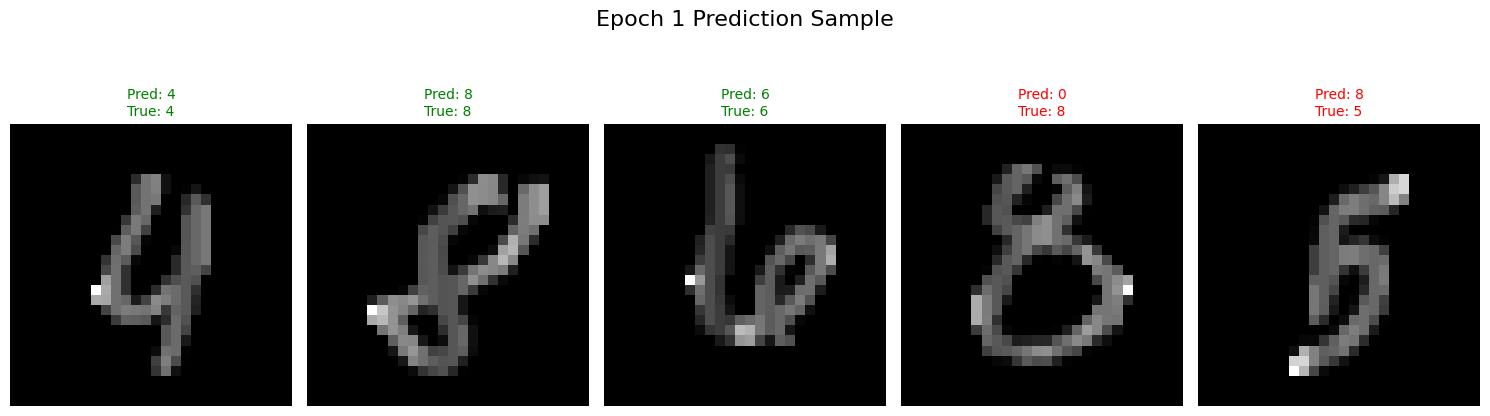

[Callback] PlotHistoryCallback: Epoch 1 ended. Logs: {'accuracy': 0.8818148374557495, 'loss': 0.442857950925827, 'val_accuracy': 0.940666675567627, 'val_loss': 0.2188718467950821, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8104 - loss: 0.7371 - val_accuracy: 0.9407 - val_loss: 0.2189 - learning_rate: 0.0010
Epoch 2/10
1666/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.2390
Epoch 2: val_loss improved from 0.21887 to 0.17374, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 2 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[Callback] Saved predictions plot for epoch 2 as epoch_2_predictions_20240920-090446.png


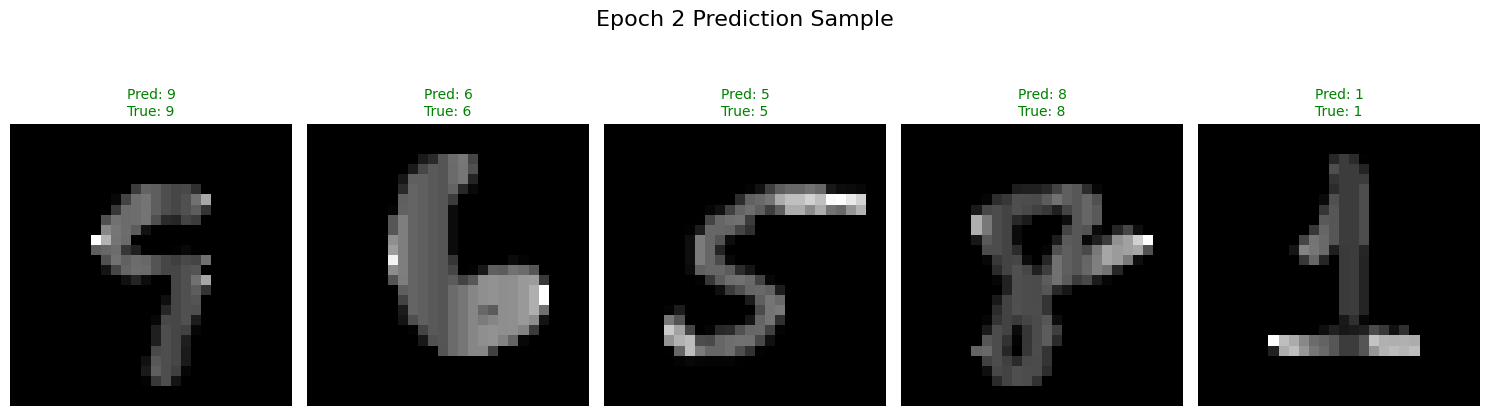

[Callback] PlotHistoryCallback: Epoch 2 ended. Logs: {'accuracy': 0.93279629945755, 'loss': 0.23242314159870148, 'val_accuracy': 0.950166642665863, 'val_loss': 0.17374403774738312, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9315 - loss: 0.2390 - val_accuracy: 0.9502 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 3/10
1670/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9458 - loss: 0.1877
Epoch 3: val_loss improved from 0.17374 to 0.15442, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 3 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[Callback] Saved predictions plot for epoch 3 as epoch_3_predictions_20240920-090449.png


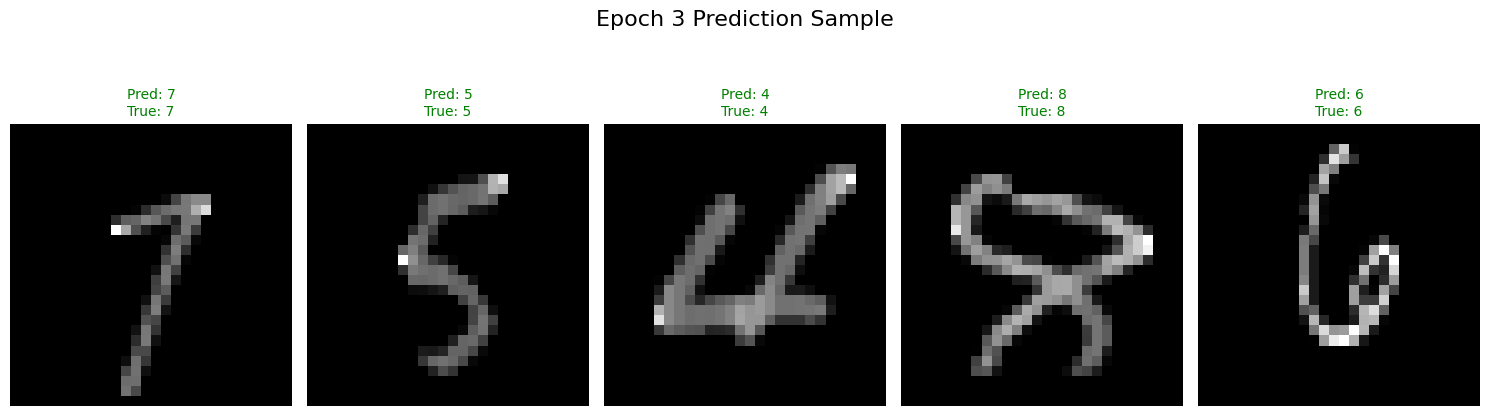

[Callback] PlotHistoryCallback: Epoch 3 ended. Logs: {'accuracy': 0.945888876914978, 'loss': 0.18498046696186066, 'val_accuracy': 0.9548333287239075, 'val_loss': 0.15442326664924622, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9458 - loss: 0.1877 - val_accuracy: 0.9548 - val_loss: 0.1544 - learning_rate: 0.0010
Epoch 4/10
1659/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9527 - loss: 0.1587
Epoch 4: val_loss improved from 0.15442 to 0.13492, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 4 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[Callback] Saved predictions plot for epoch 4 as epoch_4_predictions_20240920-090452.png


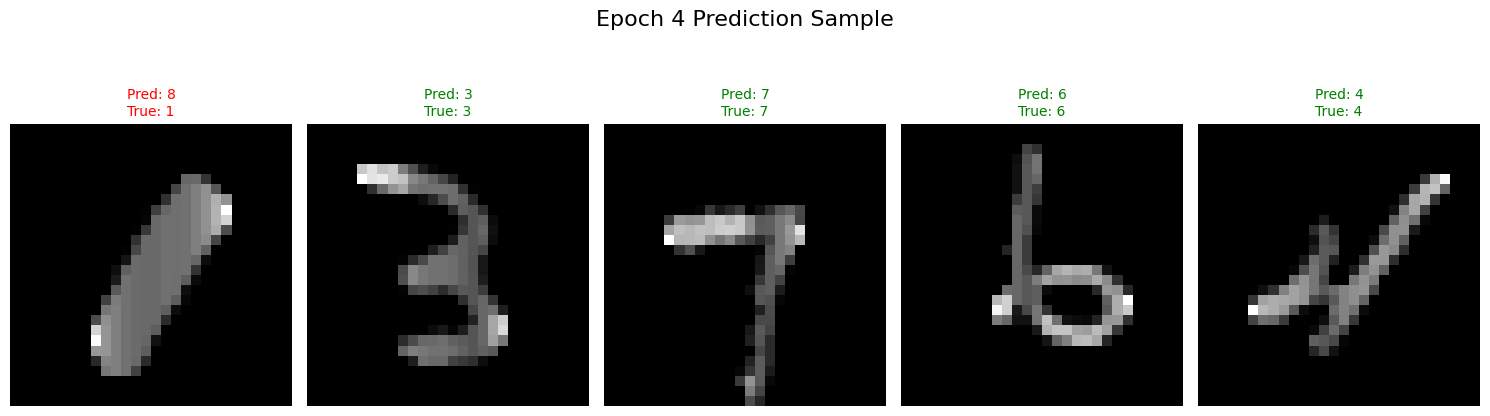

[Callback] PlotHistoryCallback: Epoch 4 ended. Logs: {'accuracy': 0.9544629454612732, 'loss': 0.1558331549167633, 'val_accuracy': 0.9601666927337646, 'val_loss': 0.1349198818206787, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9527 - loss: 0.1586 - val_accuracy: 0.9602 - val_loss: 0.1349 - learning_rate: 0.0010
Epoch 5/10
1674/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9595 - loss: 0.1342
Epoch 5: val_loss improved from 0.13492 to 0.12828, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 5 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[Callback] Saved predictions plot for epoch 5 as epoch_5_predictions_20240920-090456.png


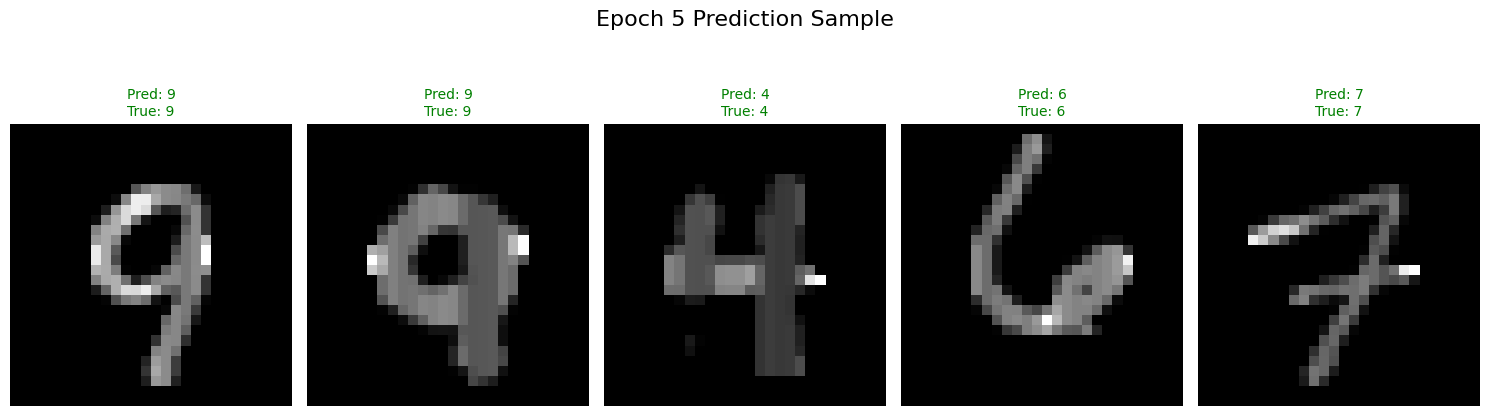

[Callback] PlotHistoryCallback: Epoch 5 ended. Logs: {'accuracy': 0.959407389163971, 'loss': 0.13460296392440796, 'val_accuracy': 0.9636666774749756, 'val_loss': 0.12828415632247925, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9595 - loss: 0.1342 - val_accuracy: 0.9637 - val_loss: 0.1283 - learning_rate: 0.0010
Epoch 6/10
1663/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.1164
Epoch 6: val_loss improved from 0.12828 to 0.12457, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 6 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 6 as epoch_6_predictions_20240920-090500.png


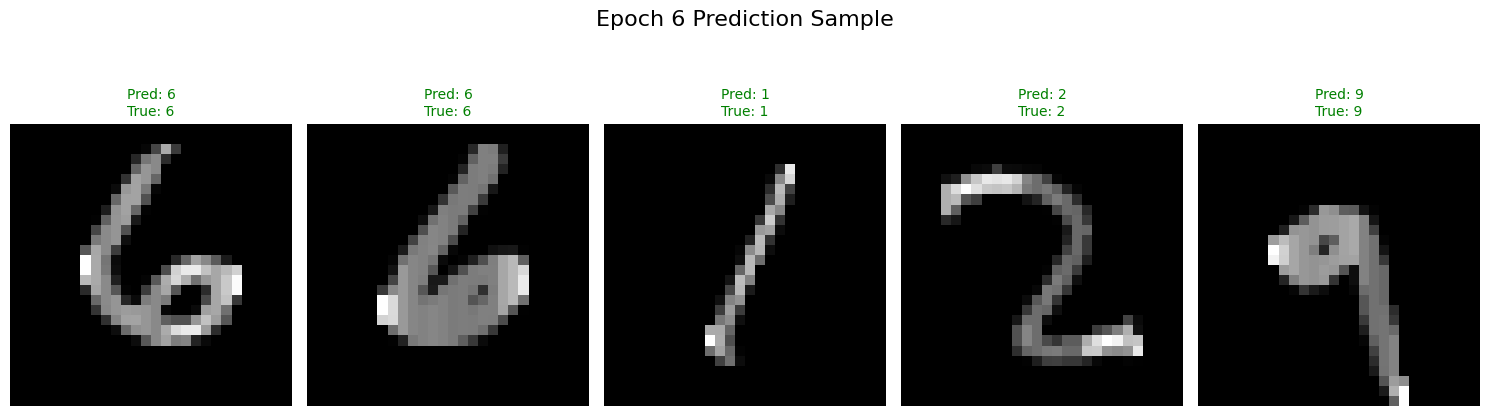

[Callback] PlotHistoryCallback: Epoch 6 ended. Logs: {'accuracy': 0.9643148183822632, 'loss': 0.11886138468980789, 'val_accuracy': 0.9626666903495789, 'val_loss': 0.1245737224817276, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9652 - loss: 0.1164 - val_accuracy: 0.9627 - val_loss: 0.1246 - learning_rate: 0.0010
Epoch 7/10
1653/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9683 - loss: 0.1055
Epoch 7: val_loss improved from 0.12457 to 0.11859, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 7 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 7 as epoch_7_predictions_20240920-090503.png


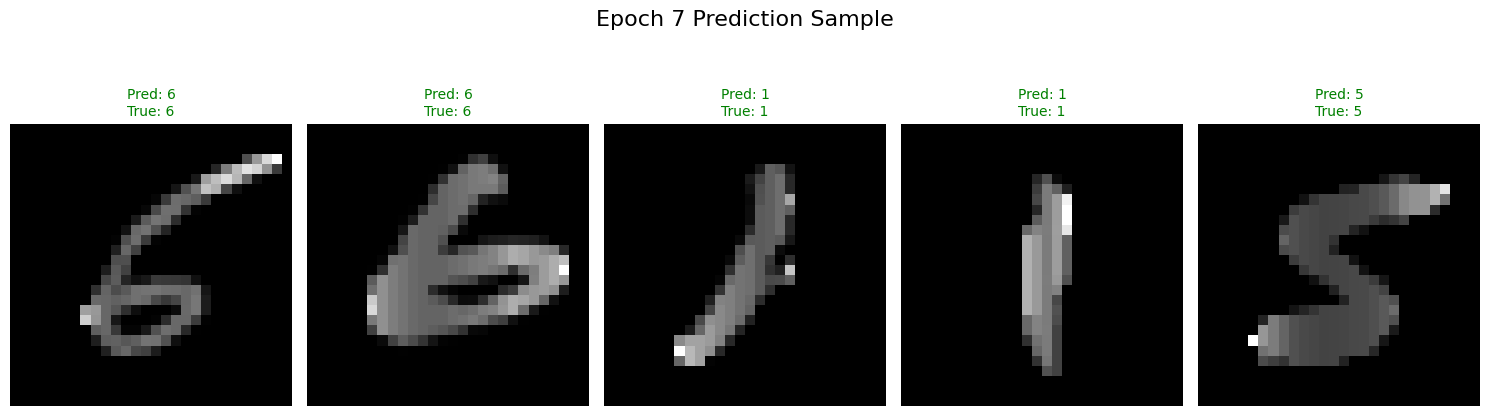

[Callback] PlotHistoryCallback: Epoch 7 ended. Logs: {'accuracy': 0.9679629802703857, 'loss': 0.10694520175457001, 'val_accuracy': 0.9649999737739563, 'val_loss': 0.11858885735273361, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1055 - val_accuracy: 0.9650 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 8/10
1683/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0953
Epoch 8: val_loss improved from 0.11859 to 0.11505, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 8 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 8 as epoch_8_predictions_20240920-090506.png


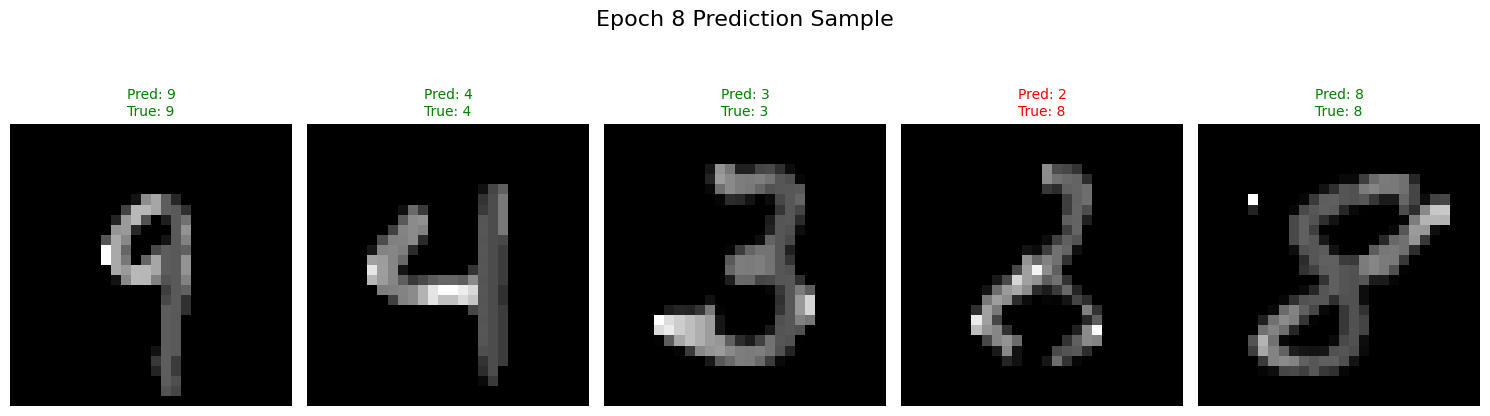

[Callback] PlotHistoryCallback: Epoch 8 ended. Logs: {'accuracy': 0.9713888764381409, 'loss': 0.09700620174407959, 'val_accuracy': 0.9643333554267883, 'val_loss': 0.11505160480737686, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0953 - val_accuracy: 0.9643 - val_loss: 0.1151 - learning_rate: 0.0010
Epoch 9/10
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.0866
Epoch 9: val_loss improved from 0.11505 to 0.11281, saving model to best_model_49a05ba0934e47f58a890d6a7f20baec.keras
[Callback] VisualizePredictionsCallback: Epoch 9 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 9 as epoch_9_predictions_20240920-090510.png


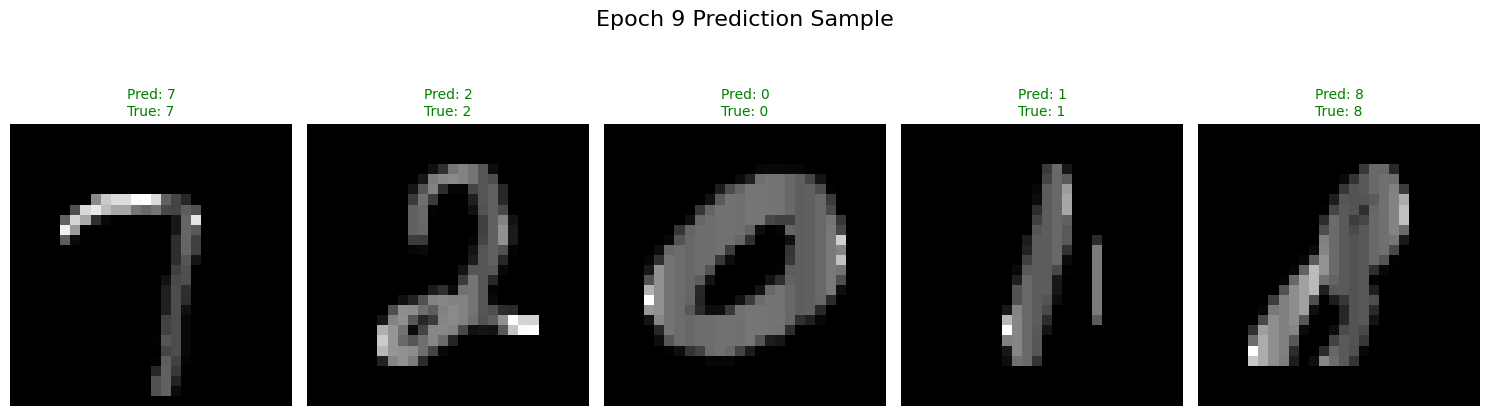

[Callback] PlotHistoryCallback: Epoch 9 ended. Logs: {'accuracy': 0.97303706407547, 'loss': 0.0896807610988617, 'val_accuracy': 0.9663333296775818, 'val_loss': 0.1128116026520729, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0866 - val_accuracy: 0.9663 - val_loss: 0.1128 - learning_rate: 0.0010
Epoch 10/10
1684/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9765 - loss: 0.0793
Epoch 10: val_loss did not improve from 0.11281
[Callback] VisualizePredictionsCallback: Epoch 10 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 10 as epoch_10_predictions_20240920-090513.png


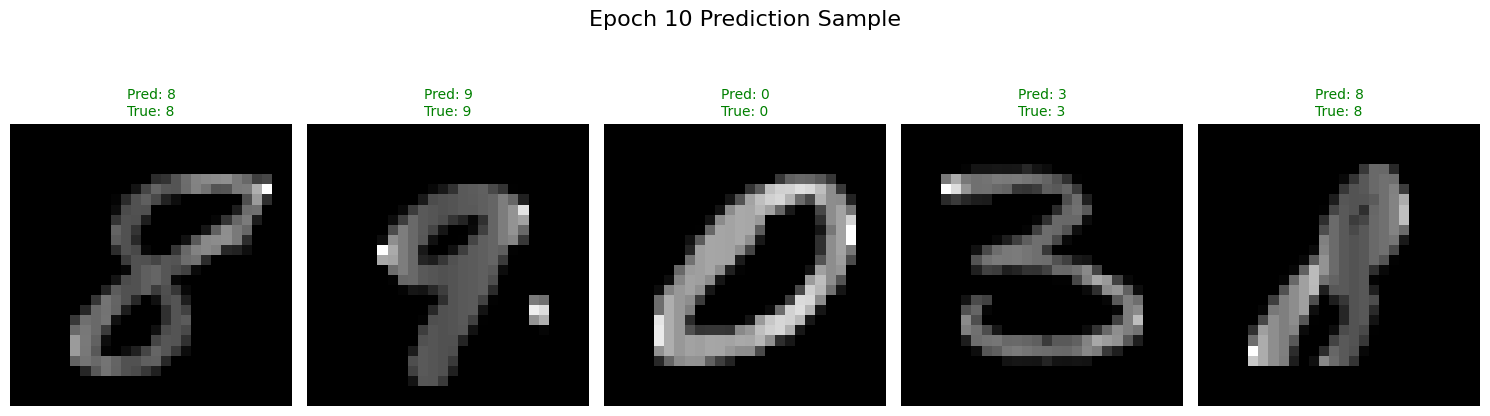

[Callback] PlotHistoryCallback: Epoch 10 ended. Logs: {'accuracy': 0.9750370383262634, 'loss': 0.08255474269390106, 'val_accuracy': 0.9649999737739563, 'val_loss': 0.11638076603412628, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0793 - val_accuracy: 0.9650 - val_loss: 0.1164 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 9.
[Callback] PlotHistoryCallback: Training ended. Plotting history.
[Callback] Training history plot saved as training_history_20240920-090514.png


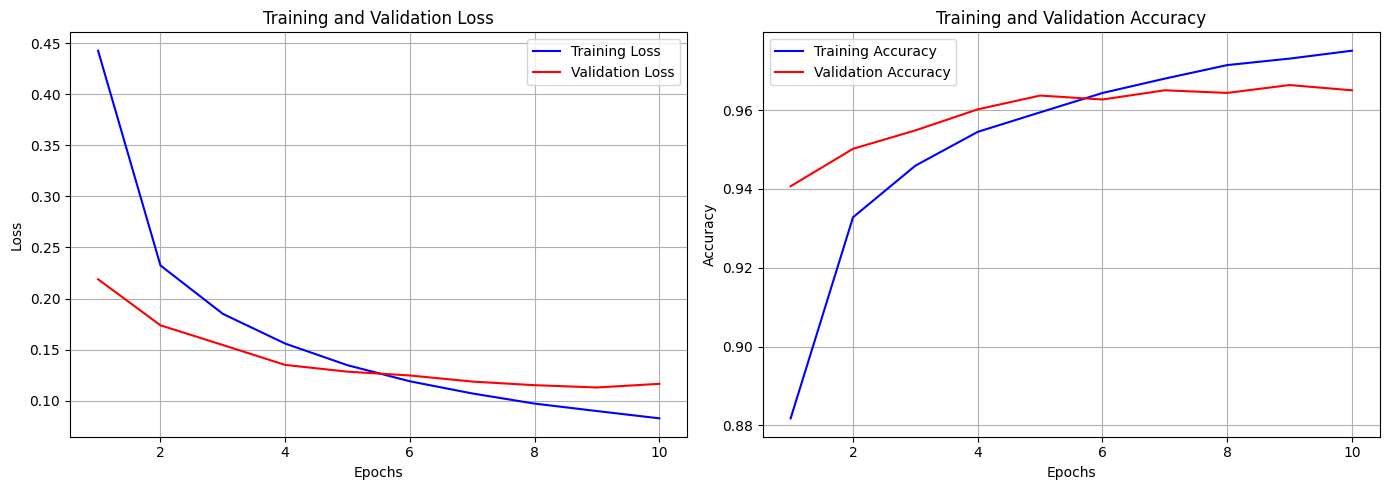

KerasClassifierWithCallbacks(
	early_stopping_patience=5
	reduce_lr_factor=0.2
	reduce_lr_patience=3
	reduce_lr_min_lr=1e-06
	disable_model_checkpoint=False
	visualize=True
	visualize_num_samples=5
	visualize_save_plot=True
	plot_history=True
	plot_history_save_plot=True
	model=<function build_model at 0x7dea04a241f0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<class 'keras.src.optimizers.adam.Adam'>
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=10
	fit__callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7de952d16920>, <keras.src.callbacks.reduce_lr_on_plateau.ReduceLROnPlateau object at 0x7de952d17400>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x7de952d17eb0>, <__main__.VisualizePredictionsCallback object at 0x7de86323d810>, <__main__.PlotHistoryCallback object at 0x7de86323dae0>]
	class_weight=None
	n_hidden=2
	n_neurons=128
	learning_rate=0.001
	activation_function=relu
	kernel_initializer=he_normal
	add_dropout=True
	dropout_rate=0.2
	add_batch_normalization=True
)

In [28]:
# Train the model
custom_keras_clf.fit(X_train, y_train)

In [29]:
# Evaluate the model
test_accuracy = custom_keras_clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 96.13%


In [30]:
# Instantiate the custom KerasClassifier
custom_keras_clf = KerasClassifierWithCallbacks(
    model=build_model,
    epochs=10,
    validation_split=0.1,
    verbose=0,
    batch_size=32,
    # Model hyperparameters
    n_hidden=2,
    n_neurons=128,
    learning_rate=0.001,
    optimizer=Adam,
    activation_function='relu',
    kernel_initializer='he_normal',
    add_dropout=True,
    dropout_rate=0.2,
    add_batch_normalization=True,
    # Callback hyperparameters
    early_stopping_patience=5,
    reduce_lr_factor=0.2,
    reduce_lr_patience=3,
    reduce_lr_min_lr=1e-6,
    disable_model_checkpoint=True,
    visualize=False,
    visualize_num_samples=5,
    visualize_save_plot=False,
    plot_history=False,
    plot_history_save_plot=False
)

[Function] build_callbacks: Callbacks have been built and added.
[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.


In [31]:
# Define the parameter distributions including callback parameters
param_distributions = {
    # Model hyperparameters
    'n_hidden': [1, 2],
    'n_neurons': [64, 128],
    'learning_rate': loguniform(1e-4, 5e-3),
    'optimizer': [Adam, Nadam],
    'activation_function': ['relu', 'selu'],
    'kernel_initializer': ['he_normal', 'glorot_normal'],
    'add_dropout': [True, False],
    'dropout_rate': uniform(0.2, 0.1),
    'add_batch_normalization': [True, False],
    # Callback hyperparameters
    'early_stopping_patience': [3, 5],
    'reduce_lr_factor': [0.1, 0.2],
    'reduce_lr_patience': [2, 3],
    'reduce_lr_min_lr': loguniform(1e-6, 1e-5)
}

In [32]:
# Number of parameter settings to sample
n_iter_search = 10

# Define the randomized search
random_search = RandomizedSearchCV(
    estimator=custom_keras_clf,
    param_distributions=param_distributions,
    n_iter=n_iter_search,
    cv=3,
    verbose=3,
    n_jobs=1,
    random_state=42
)

# Run the randomized search
random_search.fit(X_train, y_train)

[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.
[Function] build_model: Model has been built and compiled.
Restoring model weights from the end of the best epoch: 10.
[CV 1/3] END activation_function=relu, add_batch_normalization=False, add_dropout=True, dropout_rate=0.21834347898661638, early_stopping_patience=5, kernel_initializer=he_normal, learning_rate=0.001032833974654989, n_hidden=2, n_neurons=64, optimizer=<class 'keras.src.optimizers.adam.Adam'>, reduce_lr_factor=0.1, reduce_lr_min_lr=2.8790479097932933e-06, reduce_lr_patience=2;, score=0.953 total time=  20.7s
[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.
[Function] build_model: Model has been built and compiled.
Restoring model weights from the end of the best epoch: 10.
[CV 2/3] END activation_function=relu, add_batch_normalization=

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifierWithCallbacks(add_batch_normalization=True, add_dropout=True, batch_size=32, build_fn=None, callbacks=None, class_weight=None, disable_model_checkpoint=True, epochs=10, fit__callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7de863a7a6e0>, <keras.src.callbacks.reduce_lr_on_plateau.ReduceLRO...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7de863a7a620>,
                                        'n_hidden': [1, 2],
                                        'n_neurons': [64, 128],
                                        'optimizer': [<class 'keras.src.optimizers.adam.Adam'>,
                                                      <class 'keras.src.optimizers.nadam.Nadam'>],
                                        'reduce_lr_factor': [0.1, 0.2],
                                        'reduce_lr_min_lr': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7de863a780d0>,
                                        'reduce_lr_patience': [2, 3]},
                   random_state=42, verbose=3)

In [33]:
# Display the best parameters and score
print("Best Parameters:")
print(random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {random_search.best_score_ * 100:.2f}%")

Best Parameters:
{'activation_function': 'selu', 'add_batch_normalization': True, 'add_dropout': True, 'dropout_rate': 0.21988424040888052, 'early_stopping_patience': 5, 'kernel_initializer': 'he_normal', 'learning_rate': 0.002200313389277019, 'n_hidden': 1, 'n_neurons': 64, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'reduce_lr_factor': 0.1, 'reduce_lr_min_lr': 4.477927166527374e-06, 'reduce_lr_patience': 3}
Best Cross-Validation Accuracy: 95.50%


In [34]:
# Retrieve the best parameters
best_params = random_search.best_params_

In [35]:
# Instantiate the custom classifier with the best parameters and enable callbacks
best_keras_clf = KerasClassifierWithCallbacks(
    model=build_model,
    epochs=15,
    validation_split=0.1,
    verbose=1,
    batch_size=32,
    # Pass the best parameters
    n_hidden=best_params['n_hidden'],
    n_neurons=best_params['n_neurons'],
    learning_rate=best_params['learning_rate'],
    optimizer=best_params['optimizer'],
    activation_function=best_params['activation_function'],
    # Callback hyperparameters
    early_stopping_patience=best_params['early_stopping_patience'],
    reduce_lr_factor=best_params['reduce_lr_factor'],
    reduce_lr_patience=best_params['reduce_lr_patience'],
    reduce_lr_min_lr=best_params['reduce_lr_min_lr'],
    disable_model_checkpoint=False,
    # Enable visualization callbacks
    visualize=True,
    visualize_num_samples=5,
    visualize_save_plot=True,
    plot_history=True,
    plot_history_save_plot=True
)

[Function] build_callbacks: Callbacks have been built and added.
[Class] KerasClassifierWithCallbacks: Initialized with callback parameters.


[Function] build_model: Model has been built and compiled.
[Callback] PlotHistoryCallback: Training started.
Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.7407
Epoch 1: val_loss improved from inf to 0.23131, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 1 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[Callback] Saved predictions plot for epoch 1 as epoch_1_predictions_20240920-091613.png


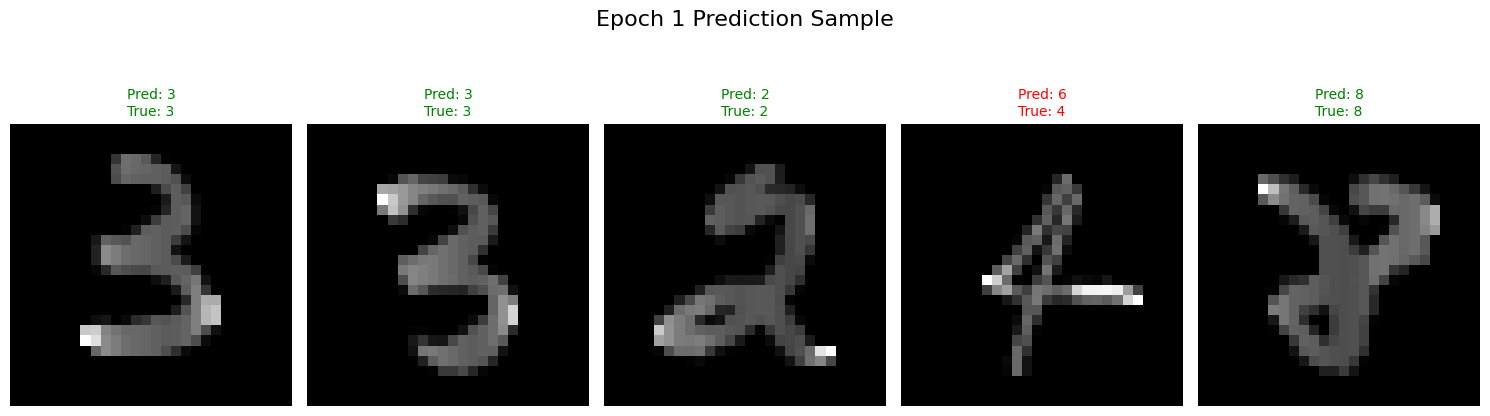

[Callback] PlotHistoryCallback: Epoch 1 ended. Logs: {'accuracy': 0.8786296248435974, 'loss': 0.45230403542518616, 'val_accuracy': 0.9346666932106018, 'val_loss': 0.23130546510219574, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8088 - loss: 0.7405 - val_accuracy: 0.9347 - val_loss: 0.2313 - learning_rate: 0.0010
Epoch 2/15
1663/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9258 - loss: 0.2583
Epoch 2: val_loss improved from 0.23131 to 0.19061, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 2 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 2 as epoch_2_predictions_20240920-091616.png


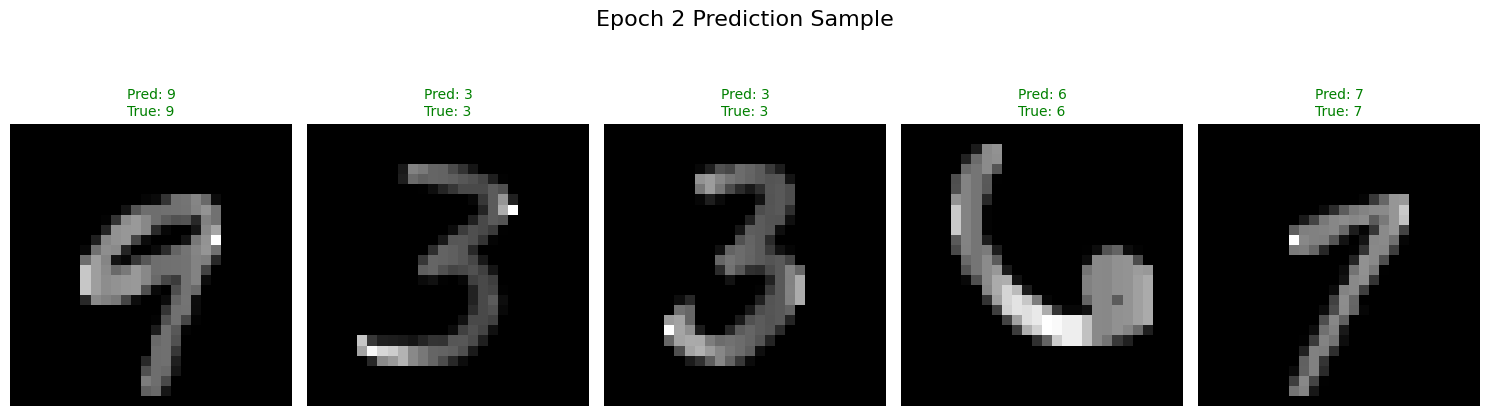

[Callback] PlotHistoryCallback: Epoch 2 ended. Logs: {'accuracy': 0.9280555844306946, 'loss': 0.24972814321517944, 'val_accuracy': 0.9443333148956299, 'val_loss': 0.19060562551021576, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9258 - loss: 0.2582 - val_accuracy: 0.9443 - val_loss: 0.1906 - learning_rate: 0.0010
Epoch 3/15
1673/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.2089
Epoch 3: val_loss improved from 0.19061 to 0.16583, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 3 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[Callback] Saved predictions plot for epoch 3 as epoch_3_predictions_20240920-091620.png


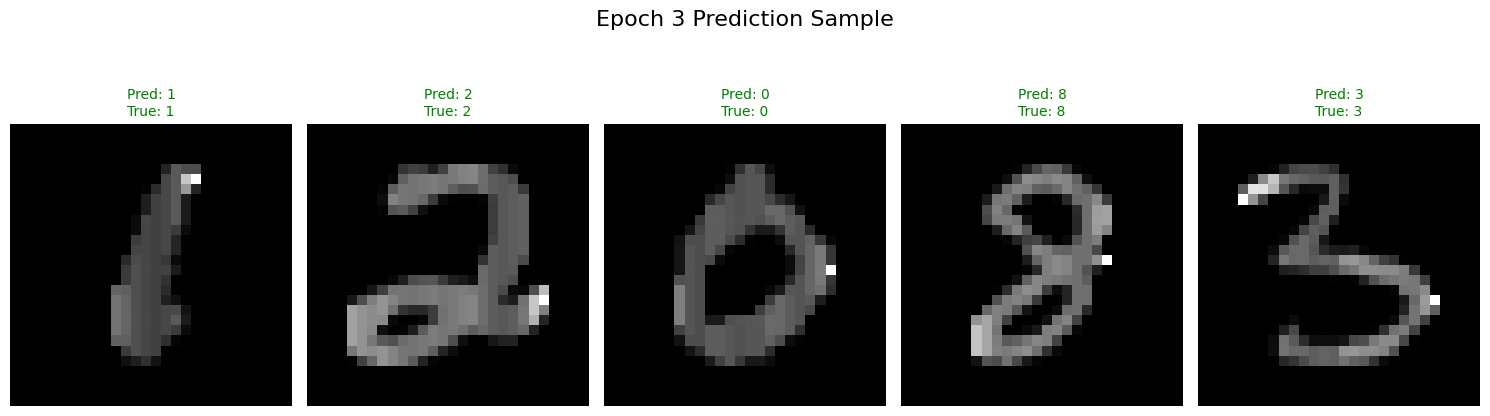

[Callback] PlotHistoryCallback: Epoch 3 ended. Logs: {'accuracy': 0.9409999847412109, 'loss': 0.20336885750293732, 'val_accuracy': 0.952833354473114, 'val_loss': 0.16582553088665009, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9401 - loss: 0.2088 - val_accuracy: 0.9528 - val_loss: 0.1658 - learning_rate: 0.0010
Epoch 4/15
1683/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9488 - loss: 0.1746
Epoch 4: val_loss improved from 0.16583 to 0.14990, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 4 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 4 as epoch_4_predictions_20240920-091623.png


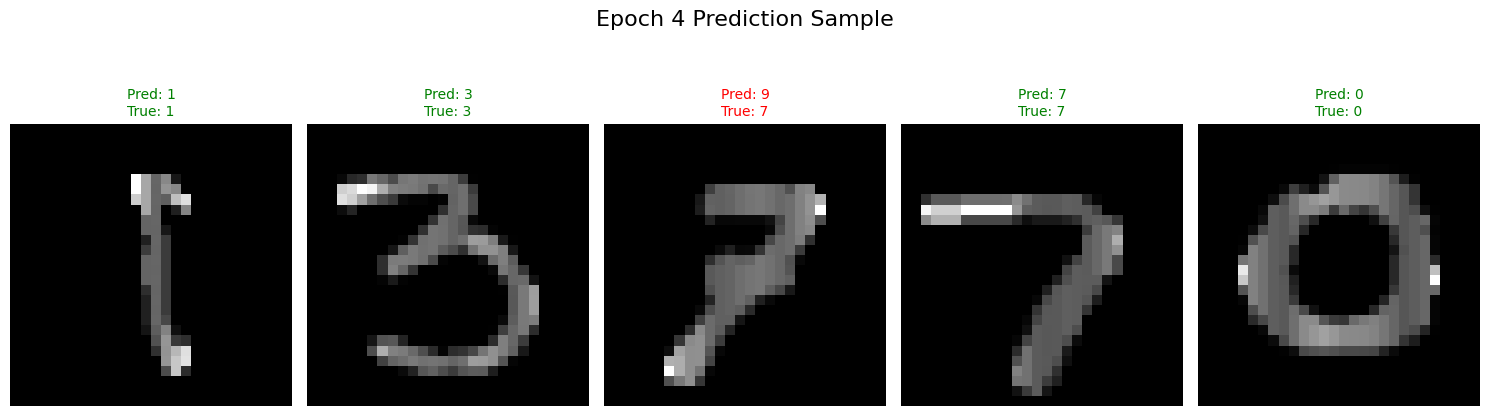

[Callback] PlotHistoryCallback: Epoch 4 ended. Logs: {'accuracy': 0.9499074220657349, 'loss': 0.1713414043188095, 'val_accuracy': 0.956166684627533, 'val_loss': 0.14989644289016724, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9488 - loss: 0.1746 - val_accuracy: 0.9562 - val_loss: 0.1499 - learning_rate: 0.0010
Epoch 5/15
1672/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9541 - loss: 0.1542
Epoch 5: val_loss improved from 0.14990 to 0.13747, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 5 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 5 as epoch_5_predictions_20240920-091626.png


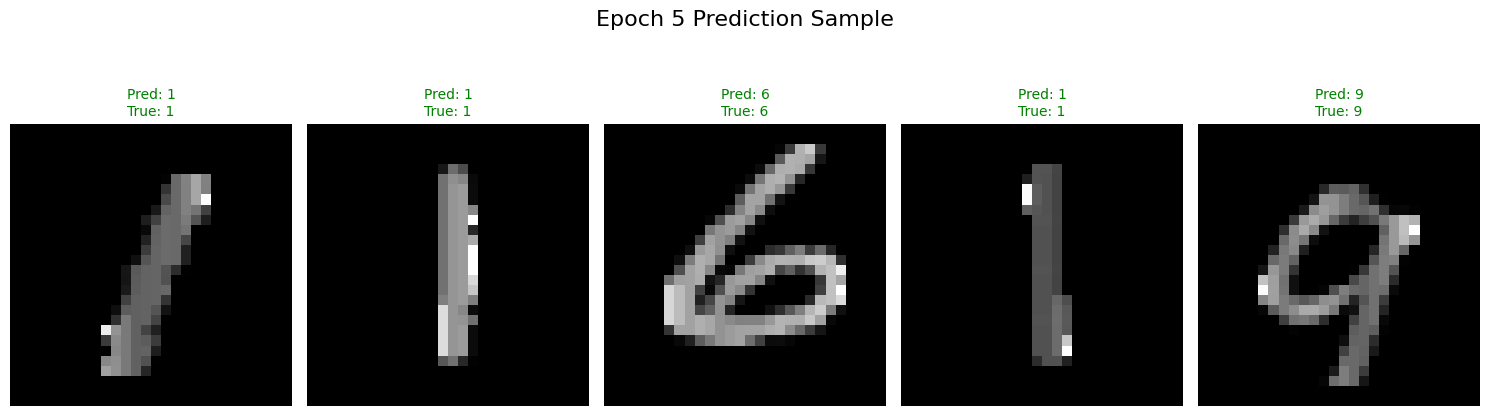

[Callback] PlotHistoryCallback: Epoch 5 ended. Logs: {'accuracy': 0.9557592868804932, 'loss': 0.14966608583927155, 'val_accuracy': 0.9610000252723694, 'val_loss': 0.13746869564056396, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9541 - loss: 0.1542 - val_accuracy: 0.9610 - val_loss: 0.1375 - learning_rate: 0.0010
Epoch 6/15
1657/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1311
Epoch 6: val_loss improved from 0.13747 to 0.13156, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 6 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 6 as epoch_6_predictions_20240920-091629.png


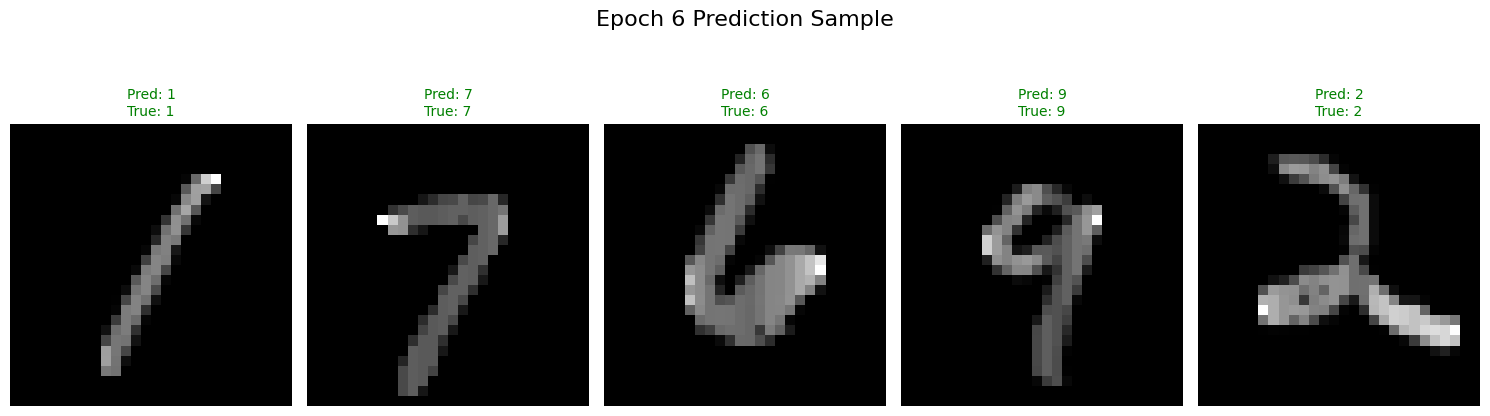

[Callback] PlotHistoryCallback: Epoch 6 ended. Logs: {'accuracy': 0.9603703618049622, 'loss': 0.1336274892091751, 'val_accuracy': 0.9624999761581421, 'val_loss': 0.1315605193376541, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.1312 - val_accuracy: 0.9625 - val_loss: 0.1316 - learning_rate: 0.0010
Epoch 7/15
1654/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1195
Epoch 7: val_loss improved from 0.13156 to 0.12713, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 7 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 7 as epoch_7_predictions_20240920-091633.png


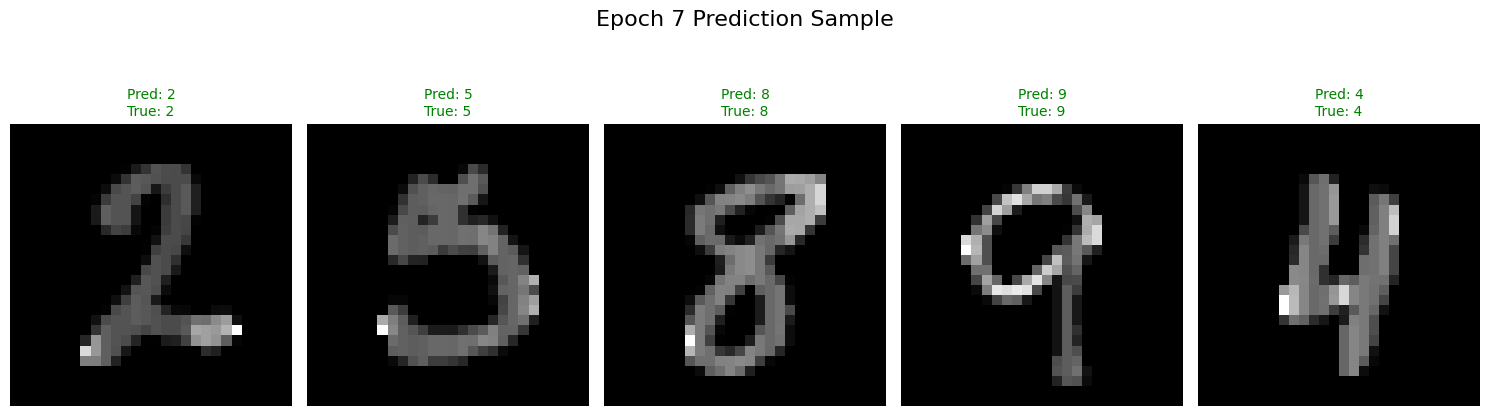

[Callback] PlotHistoryCallback: Epoch 7 ended. Logs: {'accuracy': 0.9637777805328369, 'loss': 0.12106192857027054, 'val_accuracy': 0.9633333086967468, 'val_loss': 0.12712730467319489, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1196 - val_accuracy: 0.9633 - val_loss: 0.1271 - learning_rate: 0.0010
Epoch 8/15
1665/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9671 - loss: 0.1103
Epoch 8: val_loss improved from 0.12713 to 0.11999, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 8 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 8 as epoch_8_predictions_20240920-091636.png


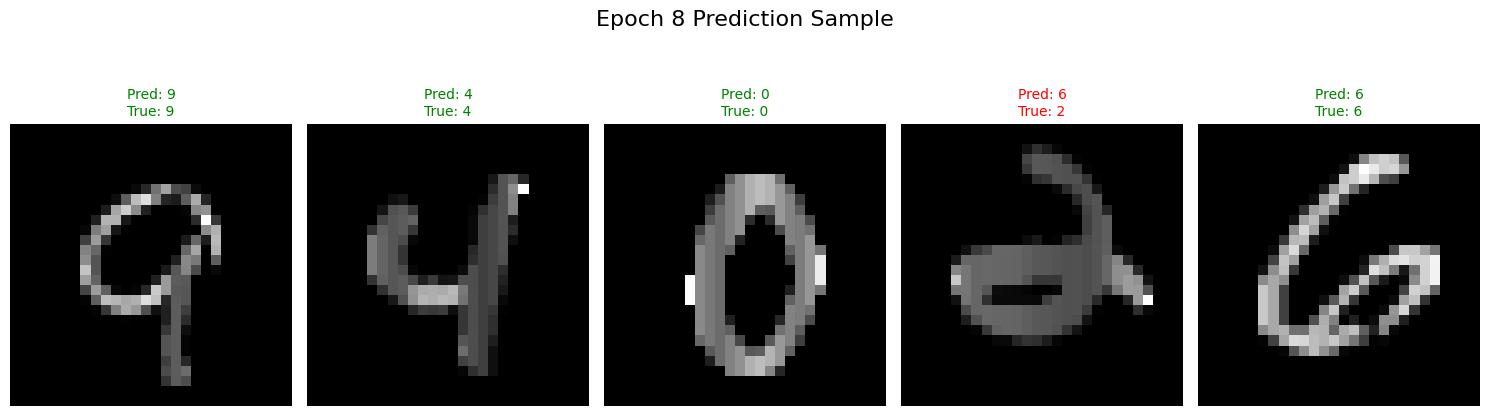

[Callback] PlotHistoryCallback: Epoch 8 ended. Logs: {'accuracy': 0.967129647731781, 'loss': 0.11055173724889755, 'val_accuracy': 0.9649999737739563, 'val_loss': 0.11999322474002838, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1103 - val_accuracy: 0.9650 - val_loss: 0.1200 - learning_rate: 0.0010
Epoch 9/15
1656/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9698 - loss: 0.0990
Epoch 9: val_loss did not improve from 0.11999
[Callback] VisualizePredictionsCallback: Epoch 9 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 9 as epoch_9_predictions_20240920-091639.png


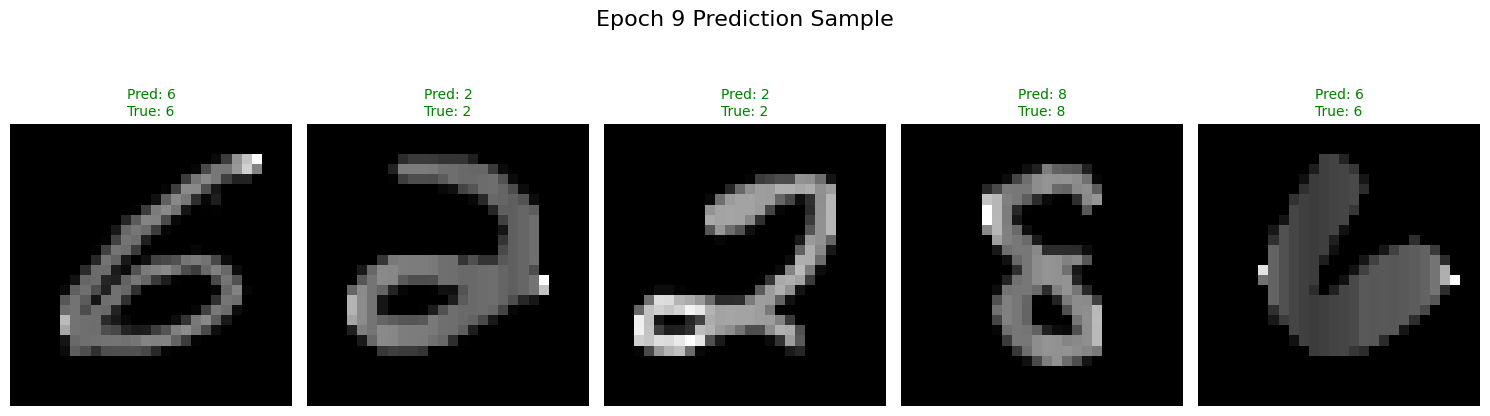

[Callback] PlotHistoryCallback: Epoch 9 ended. Logs: {'accuracy': 0.9687407612800598, 'loss': 0.10214069485664368, 'val_accuracy': 0.9626666903495789, 'val_loss': 0.12737837433815002, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9697 - loss: 0.0990 - val_accuracy: 0.9627 - val_loss: 0.1274 - learning_rate: 0.0010
Epoch 10/15
1668/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9710 - loss: 0.0974
Epoch 10: val_loss did not improve from 0.11999
[Callback] VisualizePredictionsCallback: Epoch 10 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 10 as epoch_10_predictions_20240920-091642.png


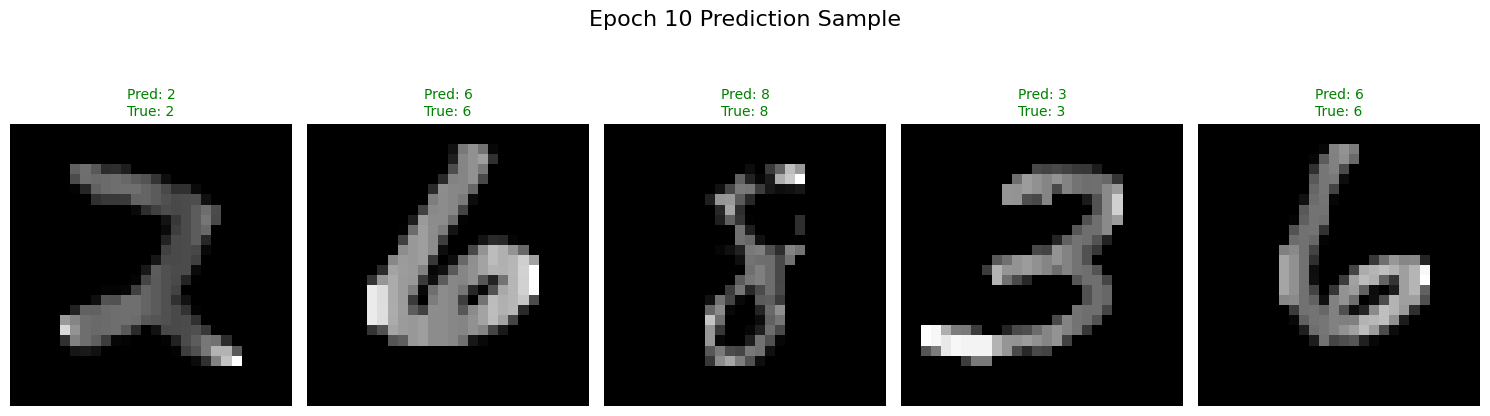

[Callback] PlotHistoryCallback: Epoch 10 ended. Logs: {'accuracy': 0.9719629883766174, 'loss': 0.09496087580919266, 'val_accuracy': 0.9638333320617676, 'val_loss': 0.12156173586845398, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9711 - loss: 0.0973 - val_accuracy: 0.9638 - val_loss: 0.1216 - learning_rate: 0.0010
Epoch 11/15
1654/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0878
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 11: val_loss did not improve from 0.11999
[Callback] VisualizePredictionsCallback: Epoch 11 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[Callback] Saved predictions plot for epoch 11 as epoch_11_predictions_20240920-091646.png


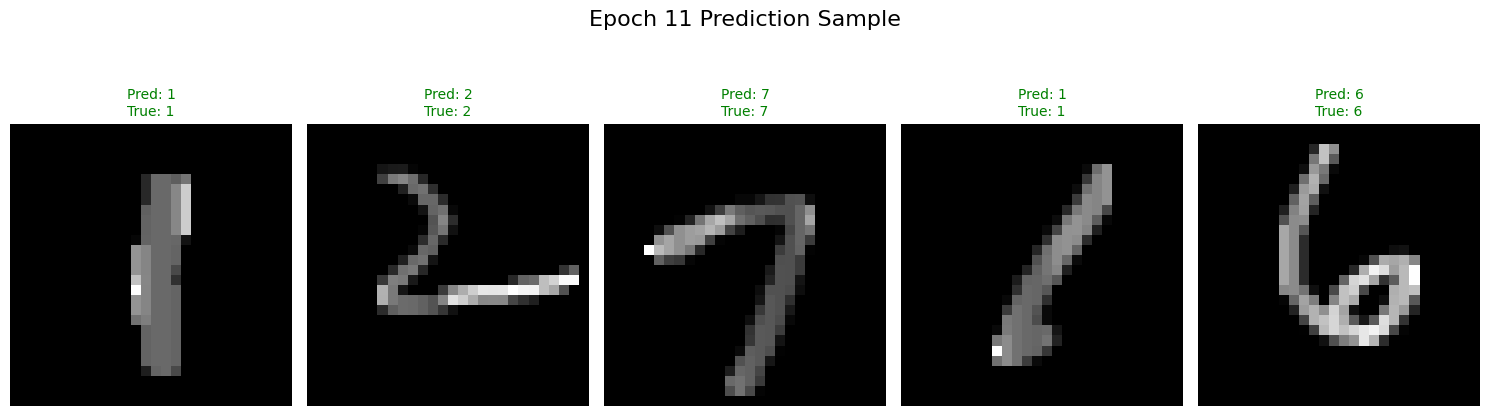

[Callback] PlotHistoryCallback: Epoch 11 ended. Logs: {'accuracy': 0.9736666679382324, 'loss': 0.08901112526655197, 'val_accuracy': 0.9649999737739563, 'val_loss': 0.12074151635169983, 'learning_rate': 0.0010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0878 - val_accuracy: 0.9650 - val_loss: 0.1207 - learning_rate: 0.0010
Epoch 12/15
1660/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0738
Epoch 12: val_loss improved from 0.11999 to 0.11430, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 12 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[Callback] Saved predictions plot for epoch 12 as epoch_12_predictions_20240920-091649.png


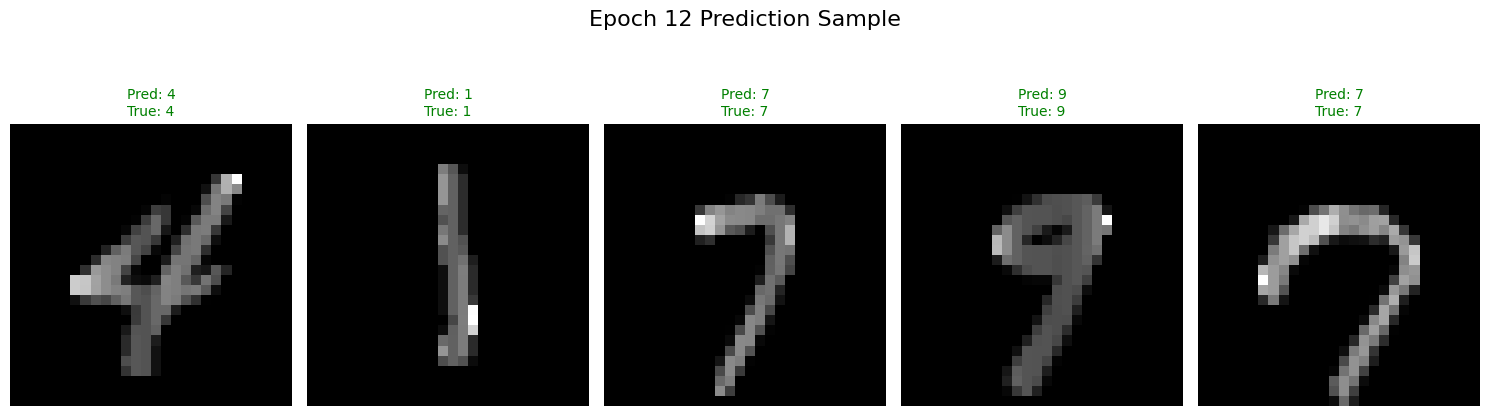

[Callback] PlotHistoryCallback: Epoch 12 ended. Logs: {'accuracy': 0.9793148040771484, 'loss': 0.0734352320432663, 'val_accuracy': 0.9679999947547913, 'val_loss': 0.11430121958255768, 'learning_rate': 0.00010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0737 - val_accuracy: 0.9680 - val_loss: 0.1143 - learning_rate: 1.0000e-04
Epoch 13/15
1685/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9812 - loss: 0.0669
Epoch 13: val_loss did not improve from 0.11430
[Callback] VisualizePredictionsCallback: Epoch 13 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 13 as epoch_13_predictions_20240920-091652.png


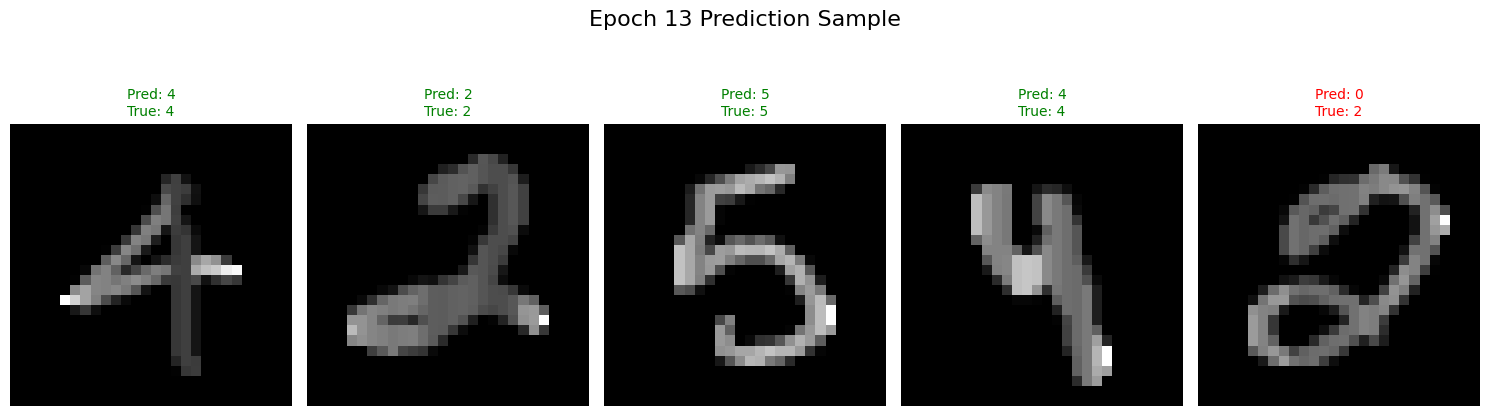

[Callback] PlotHistoryCallback: Epoch 13 ended. Logs: {'accuracy': 0.979796290397644, 'loss': 0.07182126492261887, 'val_accuracy': 0.9664999842643738, 'val_loss': 0.11505081504583359, 'learning_rate': 0.00010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0669 - val_accuracy: 0.9665 - val_loss: 0.1151 - learning_rate: 1.0000e-04
Epoch 14/15
1679/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - loss: 0.0723
Epoch 14: val_loss improved from 0.11430 to 0.11415, saving model to best_model_e050688cfe934d1dbe6e0b5f60f6595f.keras
[Callback] VisualizePredictionsCallback: Epoch 14 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[Callback] Saved predictions plot for epoch 14 as epoch_14_predictions_20240920-091655.png


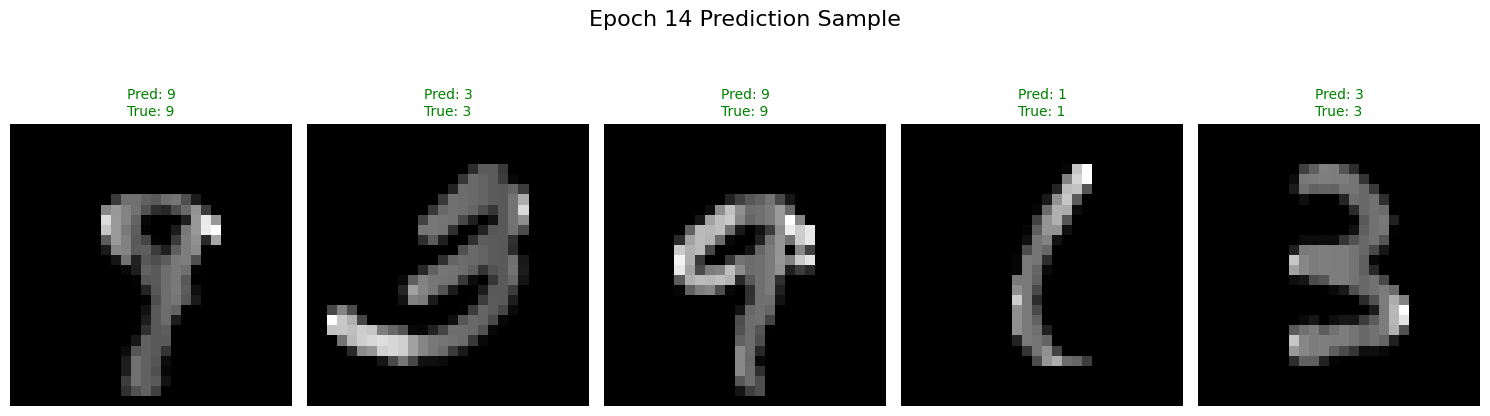

[Callback] PlotHistoryCallback: Epoch 14 ended. Logs: {'accuracy': 0.9801852107048035, 'loss': 0.07088391482830048, 'val_accuracy': 0.9676666855812073, 'val_loss': 0.1141468733549118, 'learning_rate': 0.00010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0723 - val_accuracy: 0.9677 - val_loss: 0.1141 - learning_rate: 1.0000e-04
Epoch 15/15
1677/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.0695
Epoch 15: val_loss did not improve from 0.11415
[Callback] VisualizePredictionsCallback: Epoch 15 ended.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[Callback] Saved predictions plot for epoch 15 as epoch_15_predictions_20240920-091658.png


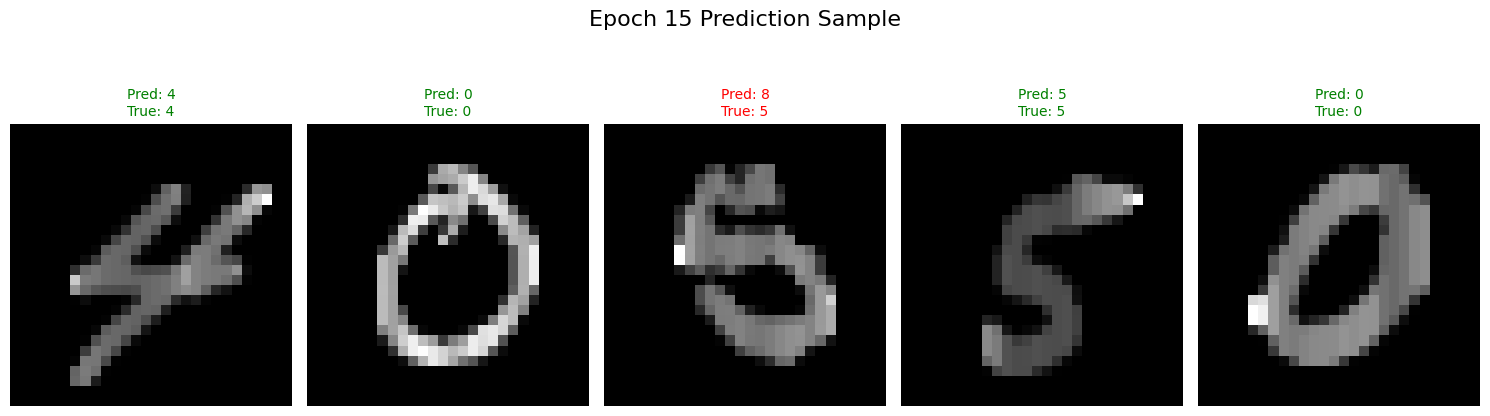

[Callback] PlotHistoryCallback: Epoch 15 ended. Logs: {'accuracy': 0.9804629683494568, 'loss': 0.07016311585903168, 'val_accuracy': 0.9670000076293945, 'val_loss': 0.11484438925981522, 'learning_rate': 0.00010000000474974513}
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0695 - val_accuracy: 0.9670 - val_loss: 0.1148 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 14.
[Callback] PlotHistoryCallback: Training ended. Plotting history.
[Callback] Training history plot saved as training_history_20240920-091659.png


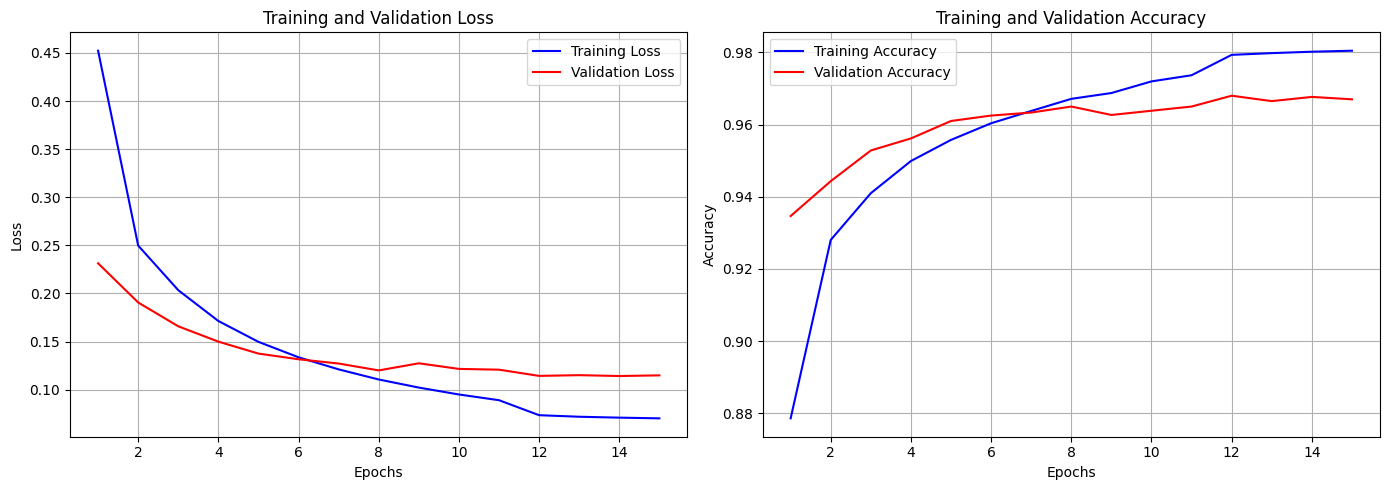

In [36]:
# Train the best model on the entire training set
best_history = best_keras_clf.fit(X_train, y_train)

In [37]:
# Evaluate the best model on the test set
best_test_accuracy = best_keras_clf.score(X_test, y_test)
print(f'Best Model Test Accuracy: {best_test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Model Test Accuracy: 96.16%


In [45]:
# Retrieve the best estimator
best_estimator = random_search.best_estimator_

# Access the underlying Keras model
best_model = best_estimator.model_

In [46]:
# Define the models directory
model_dir = '/content/models'

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

# Define the fixed filepath
best_model_path = os.path.join(model_dir, 'best_model.keras')

# Save the best model
best_model.save(best_model_path)
print(f"Best model saved to '{best_model_path}'.")

Best model saved to '/content/models/best_model.keras'.


In [47]:
# Load the best saved model
loaded_best_model = tf.keras.models.load_model(best_model_path)

In [48]:
# Evaluate the loaded model
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Loaded Best Model Test Loss: {best_test_loss:.4f}')
print(f'Loaded Best Model Test Accuracy: {best_test_accuracy * 100:.2f}%')

Loaded Best Model Test Loss: 0.1220
Loaded Best Model Test Accuracy: 96.38%
